<H1> Detecting cahnges in text using Higher Criticism</H1> 


In [1]:
#simple text processing functions

truncate_text = function(raw_text, max_length) {
  # truncate tail of raw_text to have max_length words (at most)
  paste(unlist(strsplit(raw_text, " "))[1:max_length], sep = " ", collapse = " ")
}

sample_words = function(text, n) {
 #returns n words from text by randomly sample them without replacements
  paste(sample(unlist(strsplit(text, " ")), n, replace = FALSE), sep = " ", collapse = " ")
}

num_of_words = function(raw_text) {
  #count number of words in raw_text
  length(unlist(strsplit(raw_text, " ")))
}

count_words = function(raw_text, 
                      ignore_list = c(""),
                      min.counts = 0) {
  # return the number of appearance of each word in raw_text
  # pre-processing removes punctuation and words from the ignore_list
  words <- tolower(raw_text)
  words <- gsub("[[:punct:]]", " ", words)
  words <- gsub('[0-9]+', " ", words)
  words <- unlist(strsplit(words, " "))
  words <- words[!words == ""]
  words <- words[!words == " "]
  words <- words[!words == "\n"]
#  words <- wordStem(words)
  
  words <- words[!is.element(words, ignore_list)]
  tble <- sort(table(words))
  df <- as.data.frame(tble)
  df <- filter(df, Freq >= min.counts)
  df
}

reduce_counts = function(counts, word_list) {
  # reduce the table of counts to words in word_list only
  # (returns a list of counts_
    
  c <- rep(0, length(word_list))
  
  #df <- counts[counts$words %in% word_list,]
  for(i in seq_along(word_list)) {
    fr = counts$Freq[counts$words == word_list[i]]
    if (length(fr) > 0) {
      c[i] <- fr
    }
  }
  c
}

get_word_frequency = function(text, words) {
    #get frequency of usage of words in list 'words'
        c0 = word_count(text)
        freq = c0 / sum(c0)
        ferq_common_words = reduce_counts(freq, words)
}

Dependencies and Data:

In [13]:
names(data)

[1] "phrase"      "party"       "phrasecount"

In [14]:
data %>% 
    filter(phrasecount > 9, party == D, phrase)

phrase,party,phrasecount
0 4,D,10
0 5,D,21
0 percent,D,24
0 vote,D,70
00 m,D,27
00 p,D,13
000 000,D,54
000 1,D,62
000 10,D,30
000 100,D,40


In [6]:
library(readr)
library(dplyr)
library(tidyverse)
library(data.table)
library(SnowballC)

setwd("~/Google Drive//Stats235 Hackathon//Code")
source("./HC_aux.R") #load functions for computing HC

data <- read.csv("../CongRec/ICPSR_33501 3/DS0017//by_party/byparty_2gram_110.txt", sep = "|") 


<H1>Extract a list of distinguishing words (features) from all available data</H1>
(we use the undisputed Federalists papers that contain enough written matrial by Hamilton, and the additional book: "An examination of the British doctrine... " by Madison. 

In [5]:
#feature exrtraction using all Ham and Mad texts


# this list contains "contextual" words that are not useful for distinguishin between the authors 
ignore_list = c('govern', 'trade', 
                'enemi','govern', 'legislatur','xii', 'z',
                'x', 'v', 'xi', 'xiii', 'vi', 'vii', 'ii',
                'iii', 'ix', 'war','senat', 'constitut', 'treati',
                'government', 'senate', 'president', 'jurisdiction',
               'treaty', 'legislature', 'france', 'state', 's', 'laws','union', 'national', 'power',
                'constitution','constitution', 'security','nations', 'british', 'states',
               'commerce', 'courts', 'enemies', 'britain', 'citizens','citizen','public', 'system','treaties')

corpus1 = ham.all
corpus2 = c(mad.all, as.character(mad.external))

l1 = number_of_words(corpus1)
l2 = number_of_words(corpus2)

EQUALIZE = TRUE
#truncate longer corups to number of words of shorter corpus
if(EQUALIZE) {
    if(l1 > l2) {  
    #text1 <- truncate_text(text1, l2)
    corpus1 <- sample_words(corpus1, l2)
    }
    if(l2 > l1) {
    #text2 <- truncate_text(text2, l1)
    corpus2 <- sample_words(corpus2, l1)
}}

#count words
c1 = as.data.frame(word_count(corpus1, min.counts = 5, ignore_list = ignore_list))
c2 = as.data.frame(word_count(corpus2, min.counts = 5, ignore_list = ignore_list))
df = merge(c1,c2,by = 'words')

#compute p-values and HC w.r.t. H0 : B(c1+c2,1/2) 
pv = p.values.binom_half(df[['Freq.x']], df[['Freq.y']], min.counts = 80, alt = "two.sided")

hc = hc.vals(pv, alpha = 0.4, interp = FALSE)
print(hc$hc.star)

#extract list of distinguishing words
avail_idcs = which(!is.na(pv))[hc$p.sorted_idx[1:hc$i.max.star]]
feat = df$words
dist_data = data_frame('word' = feat[avail_idcs],
                       'p.value' = pv[avail_idcs],
                       'Ham' = df[['Freq.x']][avail_idcs], 'Mad' = df[['Freq.y']][avail_idcs])
dist_words = feat[avail_idcs]

print("list of distinguishing words (features) and their p-value under B(n = sum.counts,p = 1/2):")
print(dist_data)

[1] 11.99284
[1] "list of distinguishing words (features) and their p-value under B(n = sum.counts,p = 1/2):"
# A tibble: 87 x 4
   word    p.value   Ham   Mad
   <fct>     <dbl> <int> <int>
 1 of    5.13e-194  7127  4011
 2 the   7.06e-188 10213  6454
 3 to    9.71e-127  4500  2508
 4 would 1.18e-107   922   208
 5 be    2.14e-102  2274  1049
 6 a     5.26e- 74  2478  1358
 7 upon  3.11e- 72   372    35
 8 in    2.41e- 56  2783  1725
 9 will  3.28e- 54   691   230
10 there 3.38e- 49   380    77
# ... with 77 more rows


 <H1>Compare each pair of papers according to a list of words</H1>

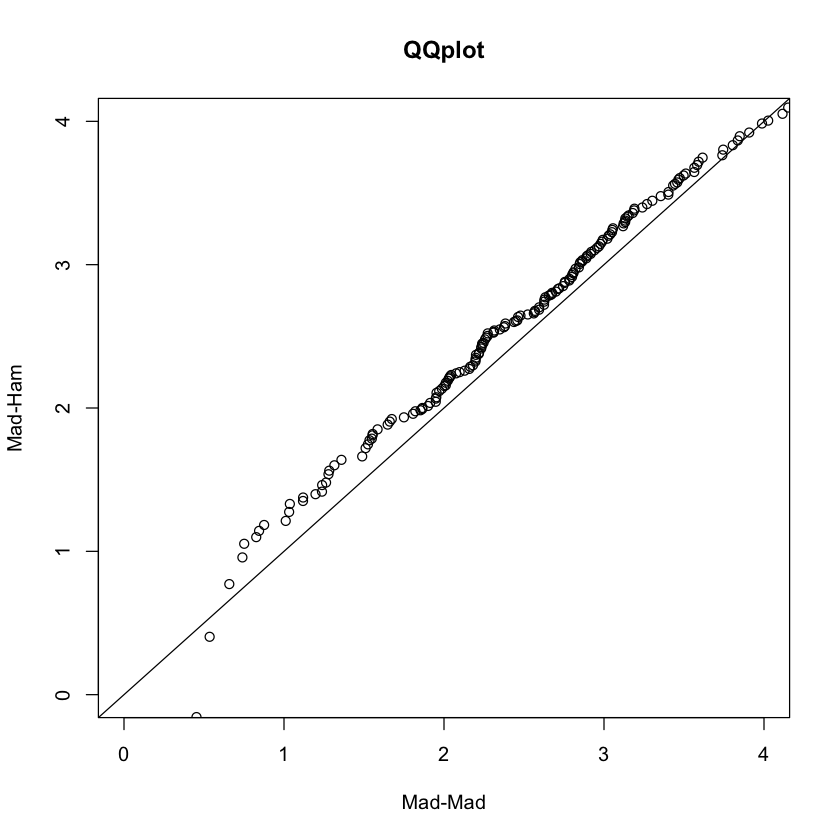

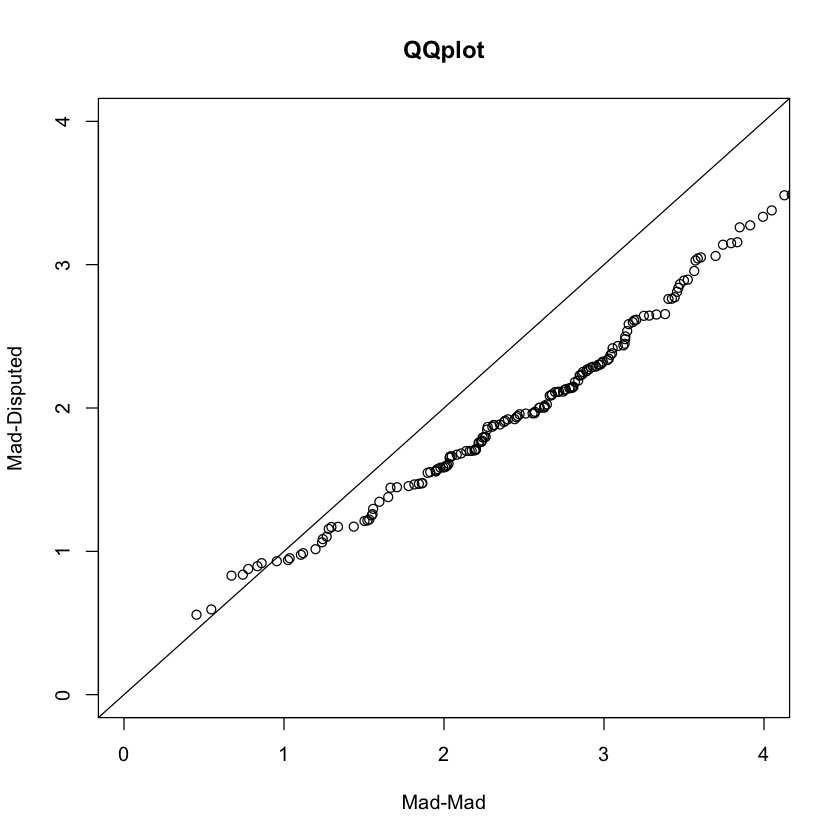

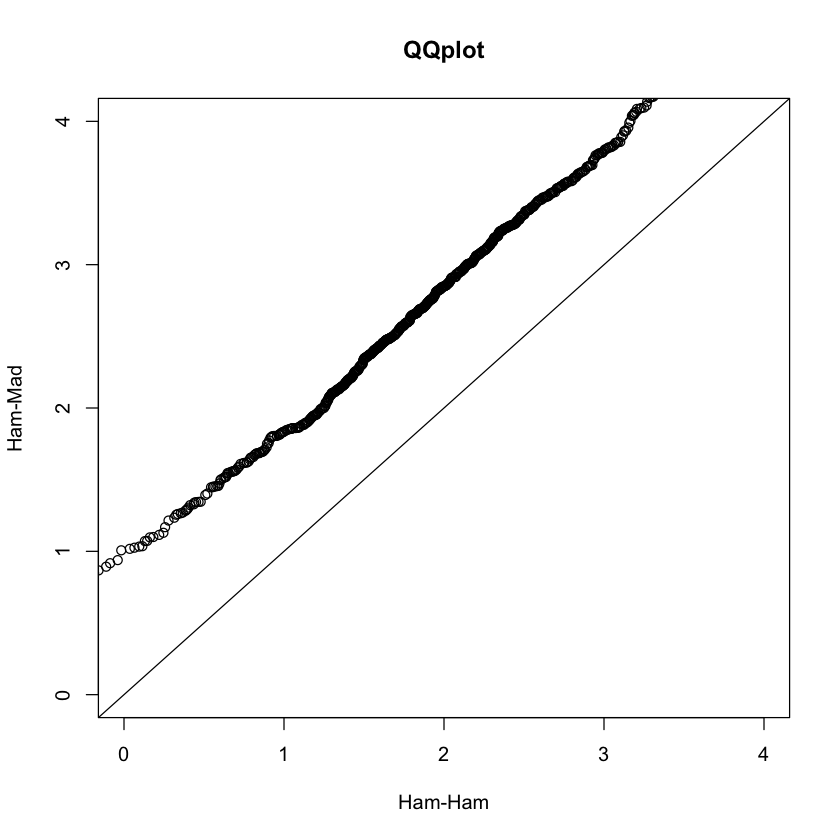

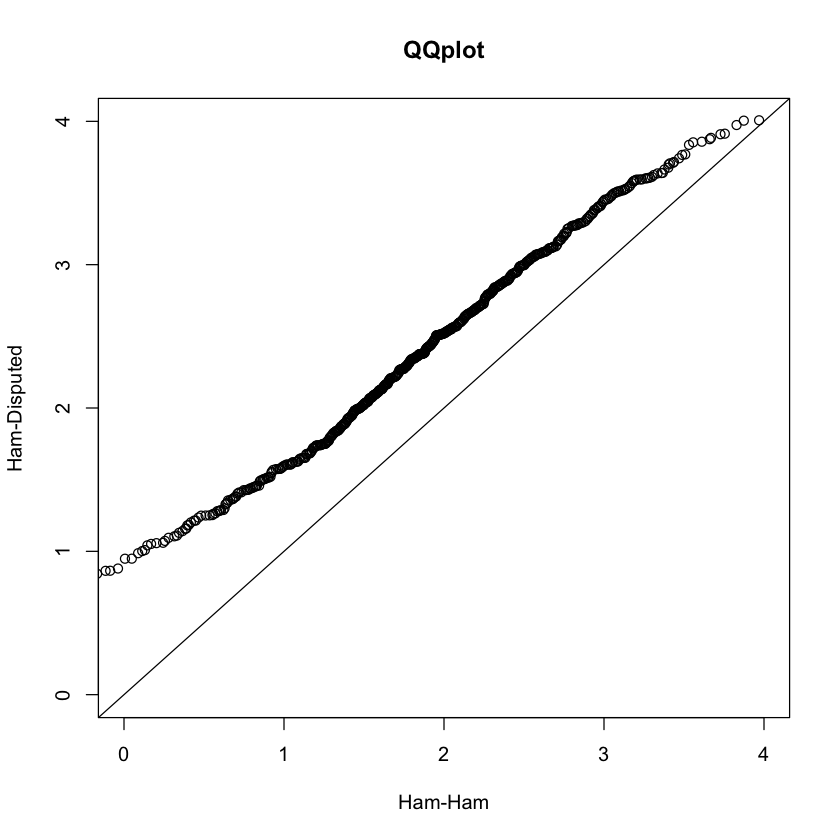

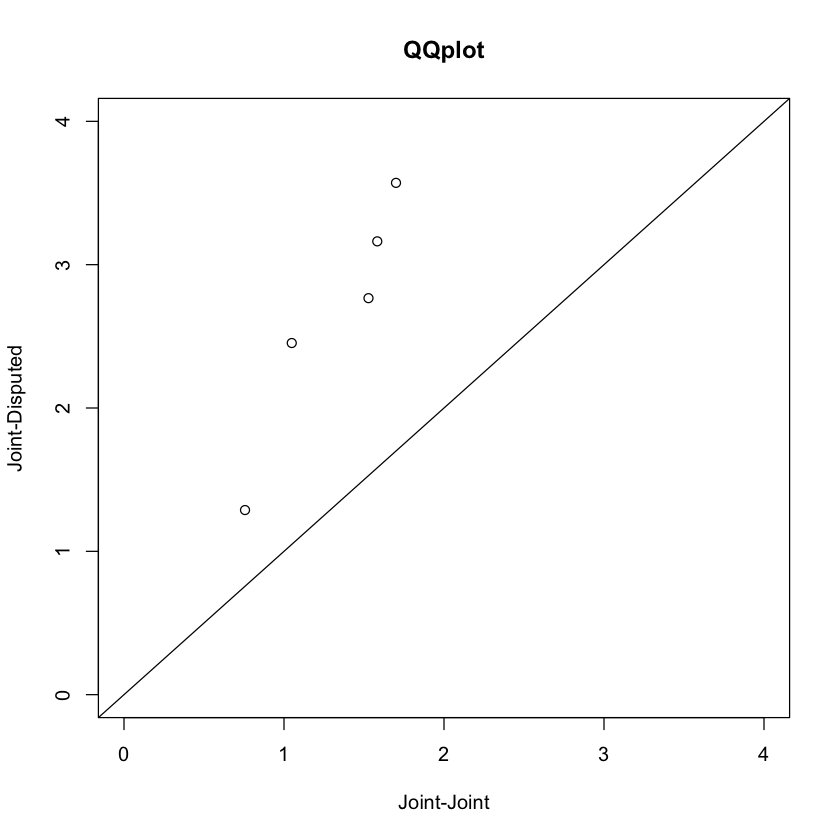

In [29]:
#qq plots

#jpeg('QQ_MM_MH_pairwise.jpg')
qqplot(MM,MH, xlab = 'Mad-Mad', ylab = 'Mad-Ham', main = 'QQplot', ylim = c(0,4), xlim = c(0,4))
abline(0,1)
#dev.off()

#jpeg('QQ_MM_MD_pairwise.jpg')
qqplot(MM,MD, xlab = 'Mad-Mad', ylab = 'Mad-Disputed', main = 'QQplot', ylim = c(0,4), xlim = c(0,4))
abline(0,1)
#dev.off()

#jpeg('QQ_HH_HM_pairwise.jpg')
qqplot(HH,HM, xlab = 'Ham-Ham', ylab = 'Ham-Mad', main = 'QQplot',ylim = c(0,4), xlim = c(0,4))
abline(0,1)
#dev.off()

#jpeg('QQ_HH_HD_pairwise.jpg')
qqplot(HH,HD, xlab = 'Ham-Ham', ylab = 'Ham-Disputed', main = 'QQplot', ylim = c(0,4), xlim = c(0,4))
abline(0,1)
#dev.off()

#jpeg('QQ_JJ_JD_pairwise.jpg')
qqplot(JJ,JD, xlab = 'Joint-Joint', ylab = 'Joint-Disputed', main = 'QQplot', ylim = c(0,4), xlim = c(0,4))
abline(0,1)
#dev.off()

In [12]:
#lists of words used by Mosteller & Wallace
#function words from Miller, Newman and Friedman 1958
function_words = 
  c('a','as','do','has','is','no','or','than','this','when',
    'all','at','down','have','it','not','our','that','to','which',
    'also','be','even','her','its','now','shall','the','up','who',
    'an','been','every','his','may','of','should','their','upon','will',
    'and','but','for','if','more','on','so','then','was','with',
    'any','by','from','in','must','one','some','there','were','would',
    'are','can','had','into','my','only','such','thing','what','your', 'hence'
  )
# two list of additional words used by Mosteller & Wallace
additional_words1 = c('affect','city','direction','innovation','perhaps','vigor',
                      'again','commonly','disgracing','join','rapid','violate','although',
                      'consequently','either','language','sarne','violence','among','considerable',
                      'enough','most','second','voice','another','contribute','nor','still',
                      'where','because','defensive','fortune','offensive','those','whether',
                      'between','destruction','function','often','throughout', 'while','both',
                      'did','himself','pass','under','whilst')

additional_words2 = c('about','choice','proper','according','common','kind','propriety','adversaries',
                      'danger','large','provision','after','decide','decides','decided','deciding',
                      'likely','requiisite','aid','degree','matters','matter','substance','always',
                      'during','moreover','they','apt','expence','expences','necessary','though',
                      'asserted','expenses','expense','necessity','necessities','truth','truths',
                      'before','extent','others','us','being','follows','follow','particularly',
                      'usages','usage','better','I','principle','we','care','imagine','edit','editing',
                      'probability','work')
